In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [2]:
from sklearn.linear_model import ElasticNetCV,RidgeCV,LinearRegression, SGDRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data = pd.read_csv('xgboost_result_UPDATED_USD000UTSTOM_ADDITIONAL_ASSETS.csv', index_col=0, parse_dates=True)
data['predicted_true'] = np.sign(data['y_test']*data['predicted'])
data['return'] = data['y_test'].abs()*data['predicted_true']
data['abs_predicted'] = np.abs(data['predicted'])
data['cost'] = 0.000045
data['net_return'] = data['return'] - data['cost']
data['day'] = data.index.date
data['error'] = np.abs(data['y_test'] - data['predicted'])

In [5]:
data2 = pd.read_csv('xgboost_result_tree_USD000UTSTOM_ADDITIONAL_ASSETS.csv', index_col=0, parse_dates=True)
data2['day'] = data2.index.date
data2['error'] = np.abs(data2['y_test'] - data2['predicted'])

In [6]:
data.head()

,y_test,predicted,predicted_true,return,abs_predicted,cost,net_return,day,error
1,,,,,,,,,
2015-06-04 10:03:00,0.000968,0.000044,1.0,0.000968,0.000044,0.00003,0.000938,2015-06-04,0.000924
2015-06-04 10:04:00,-0.000857,-0.000066,1.0,0.000857,0.000066,0.00003,0.000827,2015-06-04,0.000791
2015-06-04 10:05:00,0.000511,0.000097,1.0,0.000511,0.000097,0.00003,0.000481,2015-06-04,0.000414
2015-06-04 10:06:00,0.000201,0.000152,1.0,0.000201,0.000152,0.00003,0.000171,2015-06-04,0.000049
2015-06-04 10:07:00,0.001952,0.000030,1.0,0.001952,0.000030,0.00003,0.001922,2015-06-04,0.001922


In [8]:
data['y_test'].abs().describe()

count    159584.000000
mean          0.000313
std           0.000330
min           0.000000
25%           0.000093
50%           0.000217
75%           0.000422
max           0.006811
Name: y_test, dtype: float64

In [143]:
to_compare = pd.DataFrame()
to_compare['tree'] = data2['predicted']
to_compare['linear'] = data['predicted']
to_compare['true'] = data['y_test']
to_compare['day'] = data['day']
# to_compare = pd.merge(to_compare, grouped_error1.shift(1).reset_index(), 
#                       on='day').rename(columns={'error':'linear_error'})
# to_compare = pd.merge(to_compare, grouped_error2.shift(1).reset_index(), 
#                       on='day').rename(columns={'error':'tree_error'})

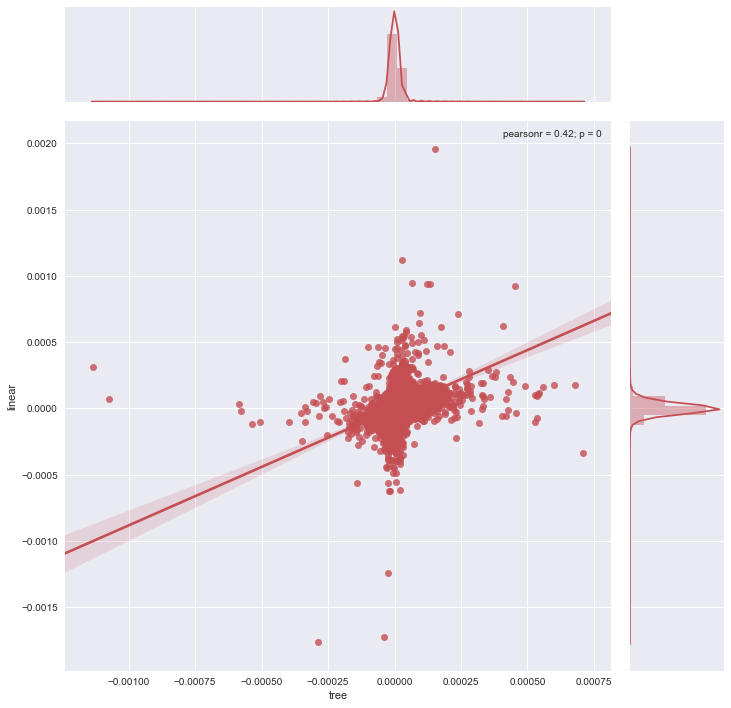

In [144]:
g = sns.jointplot("tree", "linear", data=to_compare, kind="reg", color="r", size=10)

In [145]:
to_compare['linear'].abs().describe()

count    55048.000000
mean         0.000039
std          0.000041
min          0.000000
25%          0.000014
50%          0.000029
75%          0.000052
max          0.001957
Name: linear, dtype: float64

In [101]:
3e-5*100

0.003

In [146]:
to_compare['linear'].quantile(0.9)

5.9872865676899995e-05

In [147]:
to_compare['linear'].quantile(0.1)

-5.789399147033996e-05

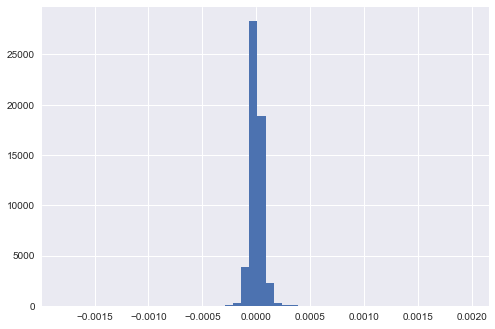

In [99]:
to_compare['linear'].hist(bins=50)

In [116]:
r_squares1, r_squares2 = [], []
for day in data['day'].unique():
    by_day = data.loc[data['day']==day]
    r_squares1.append(r2_score(by_day['y_test'], by_day['predicted']))

In [63]:
grouped_error2 = data2.groupby('day')['error'].mean()

In [114]:
grouped_error1 = data.groupby('day').agg({'error':np.mean, 'return':np.std})

In [148]:
mean_return = data.groupby('day')['return'].mean()

In [150]:
mean_return.describe()

count    310.000000
mean       0.000036
std        0.000024
min       -0.000063
25%        0.000023
50%        0.000034
75%        0.000047
max        0.000160
Name: return, dtype: float64

In [118]:
# grouped_error1 = grouped_error1.to_frame()
grouped_error1['r2'] = r_squares1

In [141]:
grouped_error1.loc[grouped_error1['r2']<-0.0152]

,return,error,r2
day,,,
2015-06-15,0.000561,0.000377,-0.039804
2015-08-31,0.000726,0.000552,-0.080967
2015-09-08,0.000554,0.000325,-0.025789
2015-09-15,0.000435,0.000326,-0.039676
2015-09-21,0.000446,0.000339,-0.044492
2015-12-15,0.000403,0.000305,-0.017004
2016-01-20,0.000505,0.000369,-0.017374
2016-01-21,0.001163,0.000814,-0.021884
2016-02-03,0.000683,0.000536,-0.018469


In [152]:
mean_return.loc[grouped_error1.loc[grouped_error1['r2']<-0.0152].index]

day
2015-06-15   -0.000023
2015-08-31    0.000023
2015-09-08    0.000033
2015-09-15    0.000027
2015-09-21    0.000025
2015-12-15   -0.000008
2016-01-20    0.000035
2016-01-21   -0.000004
2016-02-03   -0.000034
Name: return, dtype: float64

In [107]:
grouped_error2 = grouped_error2.to_frame()
grouped_error2['r2'] = r_squares2

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [110]:
grouped_error1.head()

,error,r2
day,,
2015-06-04,0.000446,0.009062
2015-06-05,0.000582,0.023172
2015-06-08,0.000413,0.024711
2015-06-09,0.000297,0.016073
2015-06-10,0.000425,0.006837


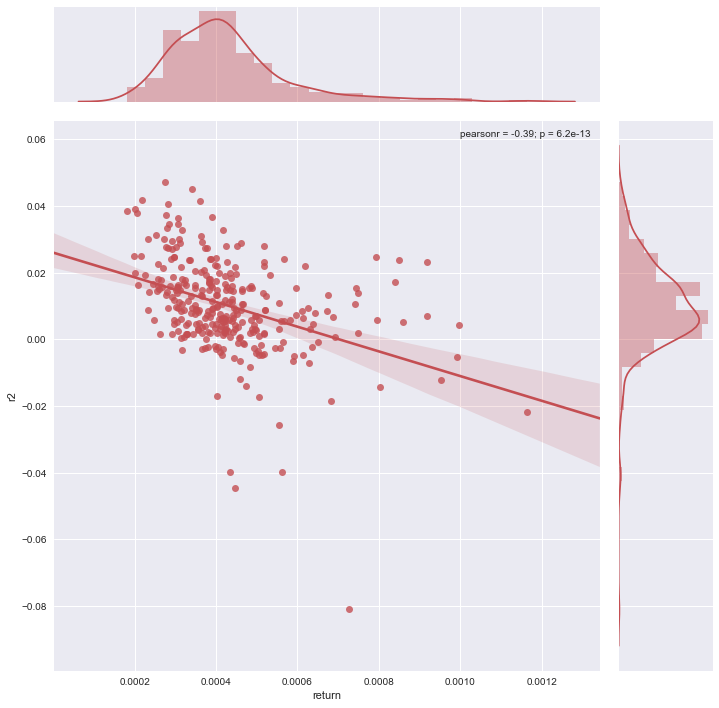

In [120]:
g = sns.jointplot("return", "r2", data=grouped_error1, kind="reg", color="r", size=10)

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  from ipykernel import kernelapp as app


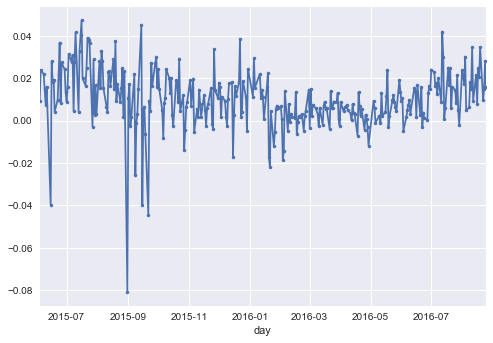

In [121]:
# 25 days
days_25 = pd.rolling_mean(grouped_error1['r2'], window=1)
days_25.loc[datetime(2015,5,12).date():].plot(marker='.')

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


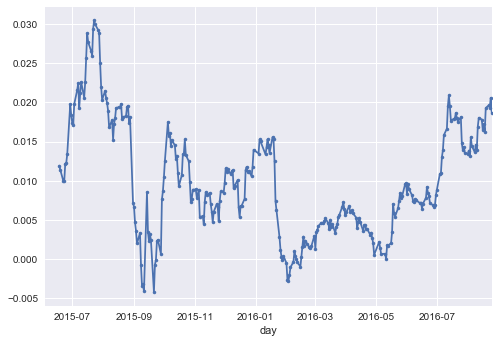

In [122]:
# 125 days tree
days_125 = pd.rolling_mean(grouped_error1['r2'], window=10)
days_125.plot(marker='.')

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


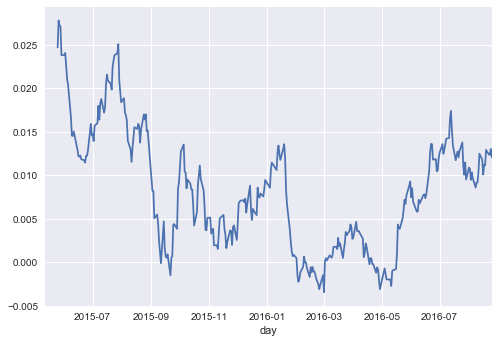

In [298]:
# 125 days linear
days_125 = pd.rolling_mean(grouped_error1['r2'], window=10)
days_125.plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


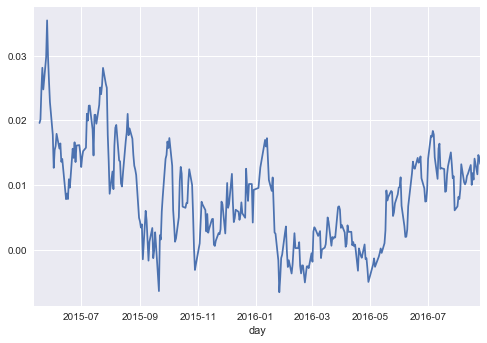

In [284]:
# 125 days
pd.rolling_mean(grouped_error1['r2'], window=5).plot()

/home/gleb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


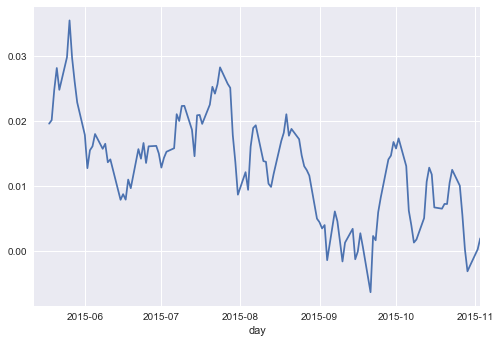

In [290]:
pd.rolling_mean(grouped_error1['r2'], window=5).plot()

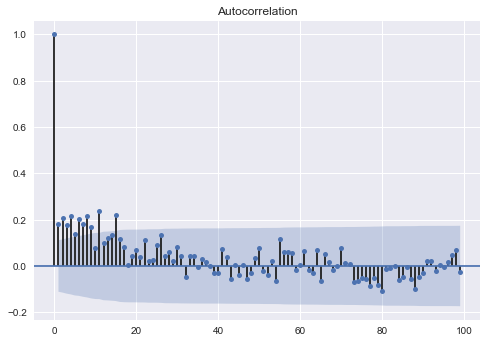

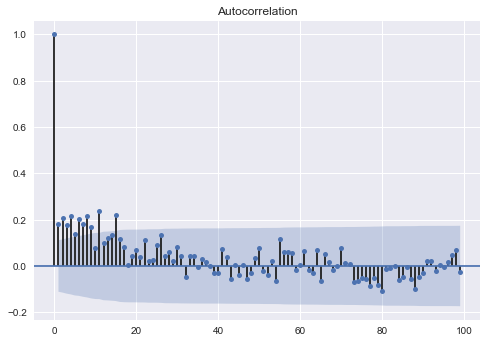

In [123]:
plot_acf(grouped_error1['r2'], lags=np.arange(100), zero=False)

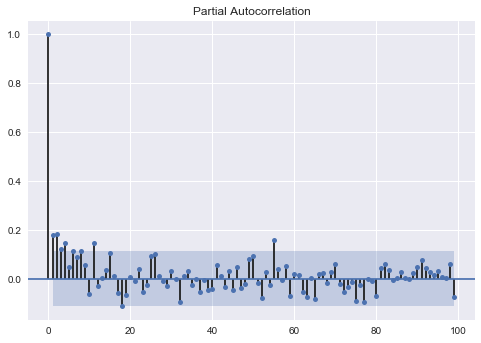

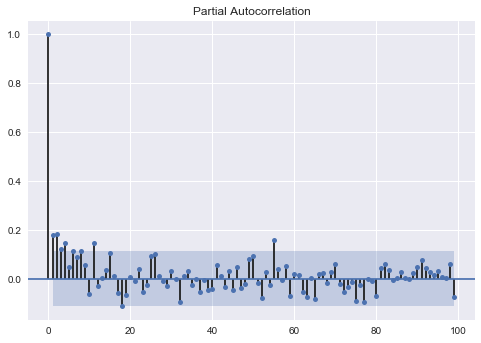

In [124]:
plot_pacf(grouped_error1['r2'], lags=np.arange(100), zero=False)

In [125]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [126]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


In [134]:
arma_mod20 = sm.tsa.ARMA(grouped_error1['r2'], (1,1)).fit()

In [135]:
arma_mod20.params

const       0.010908
ar.L1.r2    0.963536
ma.L1.r2   -0.861956
dtype: float64

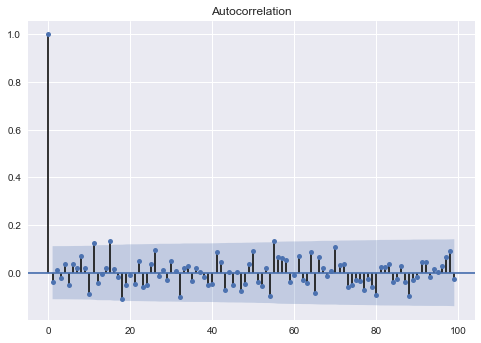

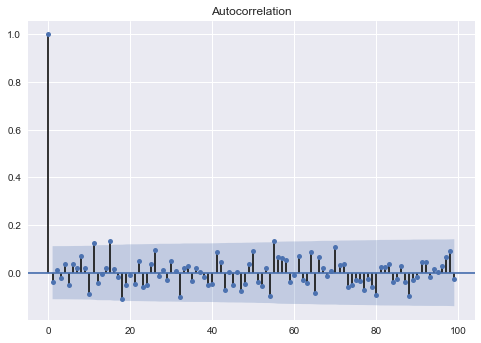

In [136]:
plot_acf(arma_mod20.resid, lags=np.arange(100), zero=False)

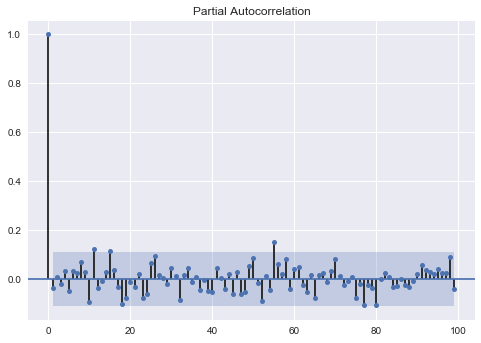

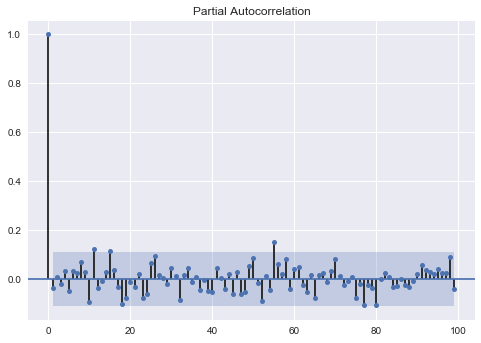

In [137]:
plot_pacf(arma_mod20.resid, lags=np.arange(100), zero=False)

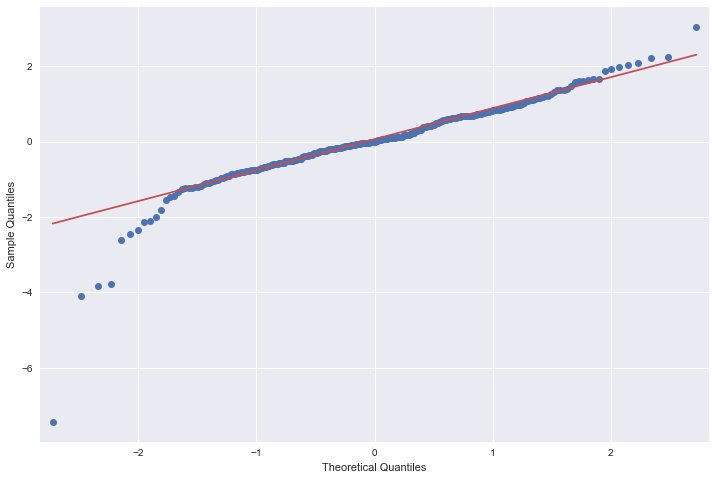

In [138]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod20.resid, line='q', ax=ax, fit=True)

In [139]:
arma_order_select_ic(grouped_error1['r2'])

/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/gleb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'bic':              0            1            2
 0 -1761.492621 -1763.254051 -1765.040116
 1 -1765.948986 -1791.091386 -1785.972309
 2 -1770.795748 -1785.966065 -1780.588978
 3 -1769.749011 -1780.233305 -1774.860244
 4 -1770.885272 -1774.935428 -1769.104508, 'bic_min_order': (1, 1)}

In [27]:
pd.merge(grouped_error1, grouped_error2, left_index=True, right_index=True)

,error_x,r2_x,error_y,r2_y
day,,,,
2015-06-04,0.000446,0.009062,0.000446,0.009107
2015-06-05,0.000582,0.023172,0.000582,0.022547
2015-06-08,0.000413,0.024711,0.000413,0.019960
2015-06-09,0.000297,0.016073,0.000296,0.018026
2015-06-10,0.000425,0.006837,0.000425,0.008417
2015-06-11,0.000345,0.014871,0.000345,0.016053
2015-06-15,0.000377,-0.046290,0.000373,-0.026402
2015-06-16,0.000312,0.027929,0.000313,0.023710
2015-06-17,0.000314,0.016782,0.000315,0.010604


In [70]:
to_compare = pd.DataFrame()
to_compare['tree'] = data2['predicted']
to_compare['linear'] = data['predicted']
to_compare['true'] = data['y_test']
to_compare['day'] = data['day']
to_compare = pd.merge(to_compare, grouped_error1.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'linear_error_lag1', 'r2': 'linear_r2_lag1'})
to_compare = pd.merge(to_compare, grouped_error1.shift(2).reset_index(), 
                      on='day').rename(columns={'error':'linear_error_lag2', 'r2': 'linear_r2_lag2'})
to_compare = pd.merge(to_compare, grouped_error2.shift(1).reset_index(), 
                      on='day').rename(columns={'error':'tree_error_lag1', 'r2': 'tree_r2_lag1'})
to_compare = pd.merge(to_compare, grouped_error2.shift(2).reset_index(), 
                      on='day').rename(columns={'error':'tree_error_lag2', 'r2': 'tree_r2_lag2'})
to_compare.dropna(inplace=True)

In [71]:
to_compare.head()

,tree,linear,true,day,linear_error_lag1,linear_r2_lag1,linear_error_lag2,linear_r2_lag2,tree_error_lag1,tree_error_lag2
1024,0.000005,0.000111,-0.000126,2015-06-08,0.000582,0.023172,0.000446,0.009062,0.000593,0.000448
1025,-0.000010,0.000028,0.001614,2015-06-08,0.000582,0.023172,0.000446,0.009062,0.000593,0.000448
1026,-0.000030,0.000015,-0.000358,2015-06-08,0.000582,0.023172,0.000446,0.009062,0.000593,0.000448
1027,0.000040,0.000011,-0.000340,2015-06-08,0.000582,0.023172,0.000446,0.009062,0.000593,0.000448
1028,-0.000024,-0.000069,0.002490,2015-06-08,0.000582,0.023172,0.000446,0.009062,0.000593,0.000448


In [72]:
y = to_compare['true']
del to_compare['true']
X = to_compare
del X['day']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.52)

In [91]:
model = ElasticNetCV(l1_ratio=[0.001, 0.005, .01, .03, .05, .07, .1, .5, .9], cv=TimeSeriesSplit(3), n_jobs=-1, normalize=True, fit_intercept=False)

In [92]:
model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=TimeSeriesSplit(n_splits=3),
       eps=0.001, fit_intercept=False,
       l1_ratio=[0.001, 0.005, 0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.9],
       max_iter=1000, n_alphas=100, n_jobs=-1, normalize=True,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [89]:
X_train

,tree,linear,linear_error_lag1,linear_r2_lag1,linear_error_lag2,linear_r2_lag2,tree_error_lag1,tree_error_lag2
35921,-3.874302e-06,1.236796e-05,0.000357,0.001375,0.000340,-0.002439,0.000357,0.000341
38729,-5.304813e-06,2.983212e-05,0.000267,0.007926,0.000309,0.011452,0.000268,0.000309
2260,1.341105e-06,1.534820e-05,0.000297,0.016073,0.000413,0.024711,0.000299,0.000417
23801,8.702278e-06,3.150105e-05,0.000335,0.012117,0.000311,0.031800,0.000338,0.000316
11900,-1.049042e-05,-1.889467e-05,0.000251,0.032088,0.000193,0.027422,0.000255,0.000193
8843,2.831221e-06,-2.604723e-05,0.000281,0.028666,0.000205,0.028135,0.000283,0.000208
42946,4.768372e-06,-2.211332e-05,0.000217,0.034216,0.000196,0.026956,0.000220,0.000195
38341,6.824732e-06,1.862645e-05,0.000309,0.011452,0.000325,-0.043512,0.000309,0.000317
21143,-5.364418e-06,-3.391504e-05,0.000399,0.004119,0.000313,0.016950,0.000399,0.000314
33788,-1.609325e-05,-3.576279e-07,0.000457,-0.001719,0.000598,0.015706,0.000457,0.000600


In [77]:
r2_score(y_test, model.predict(X_test))

0.01296766440605146

In [93]:
model.coef_

array([  6.50654286e-01,   6.44743463e-01,  -0.00000000e+00,
        -7.56301683e-06,   7.22054898e-04,   5.36709765e-05,
        -9.97562468e-03,   0.00000000e+00])

In [94]:
r2_score(y_test, X_test['linear'])

0.013251172578394921

In [79]:
import xgboost as xgb


In [80]:
param = {'max_depth': 1, 'min_child_weight': 5, 'eta': 0.1, 
         'silent': 1, 'objective': 'reg:linear',
         'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0}
dtrain = xgb.DMatrix(X_train, y_train)

In [83]:
cv = xgb.cv(param, dtrain, num_boost_round=150, nfold=5, metrics={'rmse'})

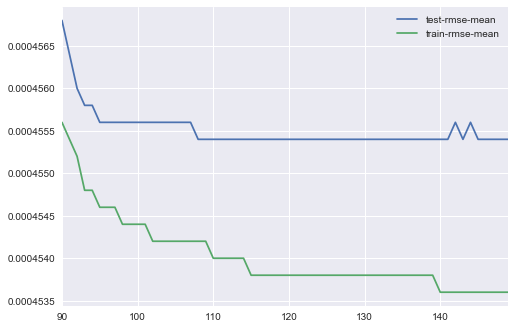

In [84]:
cv.loc[90:, ['test-rmse-mean', 'train-rmse-mean']].plot()

In [85]:
model = xgb.train(param, dtrain, num_boost_round=110)
dtest = xgb.DMatrix(X_test, y_test)

In [86]:
r2_score(y_test, model.predict(dtest))

0.013126211354275719

In [87]:
r2_score(y_test, X_test['linear'])

0.013251172578394921

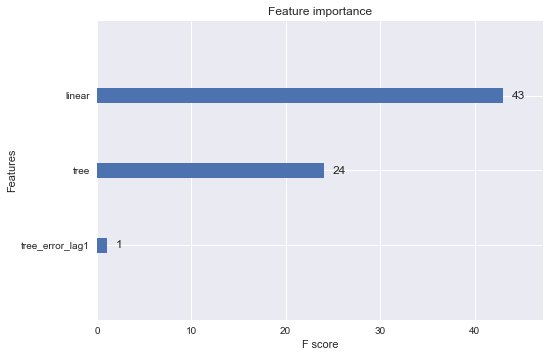

In [88]:
xgb.plot_importance(model)